# Analyse exploratoire, traitements, modélisation des données

In [56]:
# import dependencies
import pandas as pd
import numpy as np
from skimpy import skim
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
# options
pd.set_option('display.max_columns', None)
pd.set_option("display.float_format", lambda x: f"{x :.2f}")
warnings.filterwarnings('ignore')

In [36]:
# read csv
df = pd.read_csv('https://raw.githubusercontent.com/MaskiVal/DataSets/main/kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.00,80.00,1.02,1.00,0.00,NaN,normal,notpresent,notpresent,121.00,36.00,1.20,NaN,NaN,15.40,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.00,50.00,1.02,4.00,0.00,NaN,normal,notpresent,notpresent,NaN,18.00,0.80,NaN,NaN,11.30,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.00,80.00,1.01,2.00,3.00,normal,normal,notpresent,notpresent,423.00,53.00,1.80,NaN,NaN,9.60,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.00,70.00,1.00,4.00,0.00,normal,abnormal,present,notpresent,117.00,56.00,3.80,111.00,2.50,11.20,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.00,80.00,1.01,2.00,0.00,normal,normal,notpresent,notpresent,106.00,26.00,1.40,NaN,NaN,11.60,35,7300,4.6,no,no,no,good,no,no,ckd


## 1 - Exploration des données

#### 1.1.1 - Nombre de données, visualisation des colonnes du dataset

In [37]:
df.shape

(400, 26)

In [38]:
# rename columns
df.columns = ['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'anemia', 'class']
df.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,0,48.00,80.00,1.02,1.00,0.00,NaN,normal,notpresent,notpresent,121.00,36.00,1.20,NaN,NaN,15.40,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.00,50.00,1.02,4.00,0.00,NaN,normal,notpresent,notpresent,NaN,18.00,0.80,NaN,NaN,11.30,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.00,80.00,1.01,2.00,3.00,normal,normal,notpresent,notpresent,423.00,53.00,1.80,NaN,NaN,9.60,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.00,70.00,1.00,4.00,0.00,normal,abnormal,present,notpresent,117.00,56.00,3.80,111.00,2.50,11.20,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.00,80.00,1.01,2.00,0.00,normal,normal,notpresent,notpresent,106.00,26.00,1.40,NaN,NaN,11.60,35,7300,4.6,no,no,no,good,no,no,ckd


#### 1.1.2 - Observation des types de données

In [39]:
df.info()
# there are some numeric columns that are stored as object
# i need to convert them to numeric
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

#### 1.1.3 - Observation des valeurs Null

In [40]:
# a lot of columns have null values/ what can i do
df.isnull().sum()

id                           0
age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
anemia                       1
class                        0
dtype: int64

### 1.2 - Observation des variables numériques

#### 1.2.1 - Analyse de la distribution

In [41]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']
num_cols.remove('id')

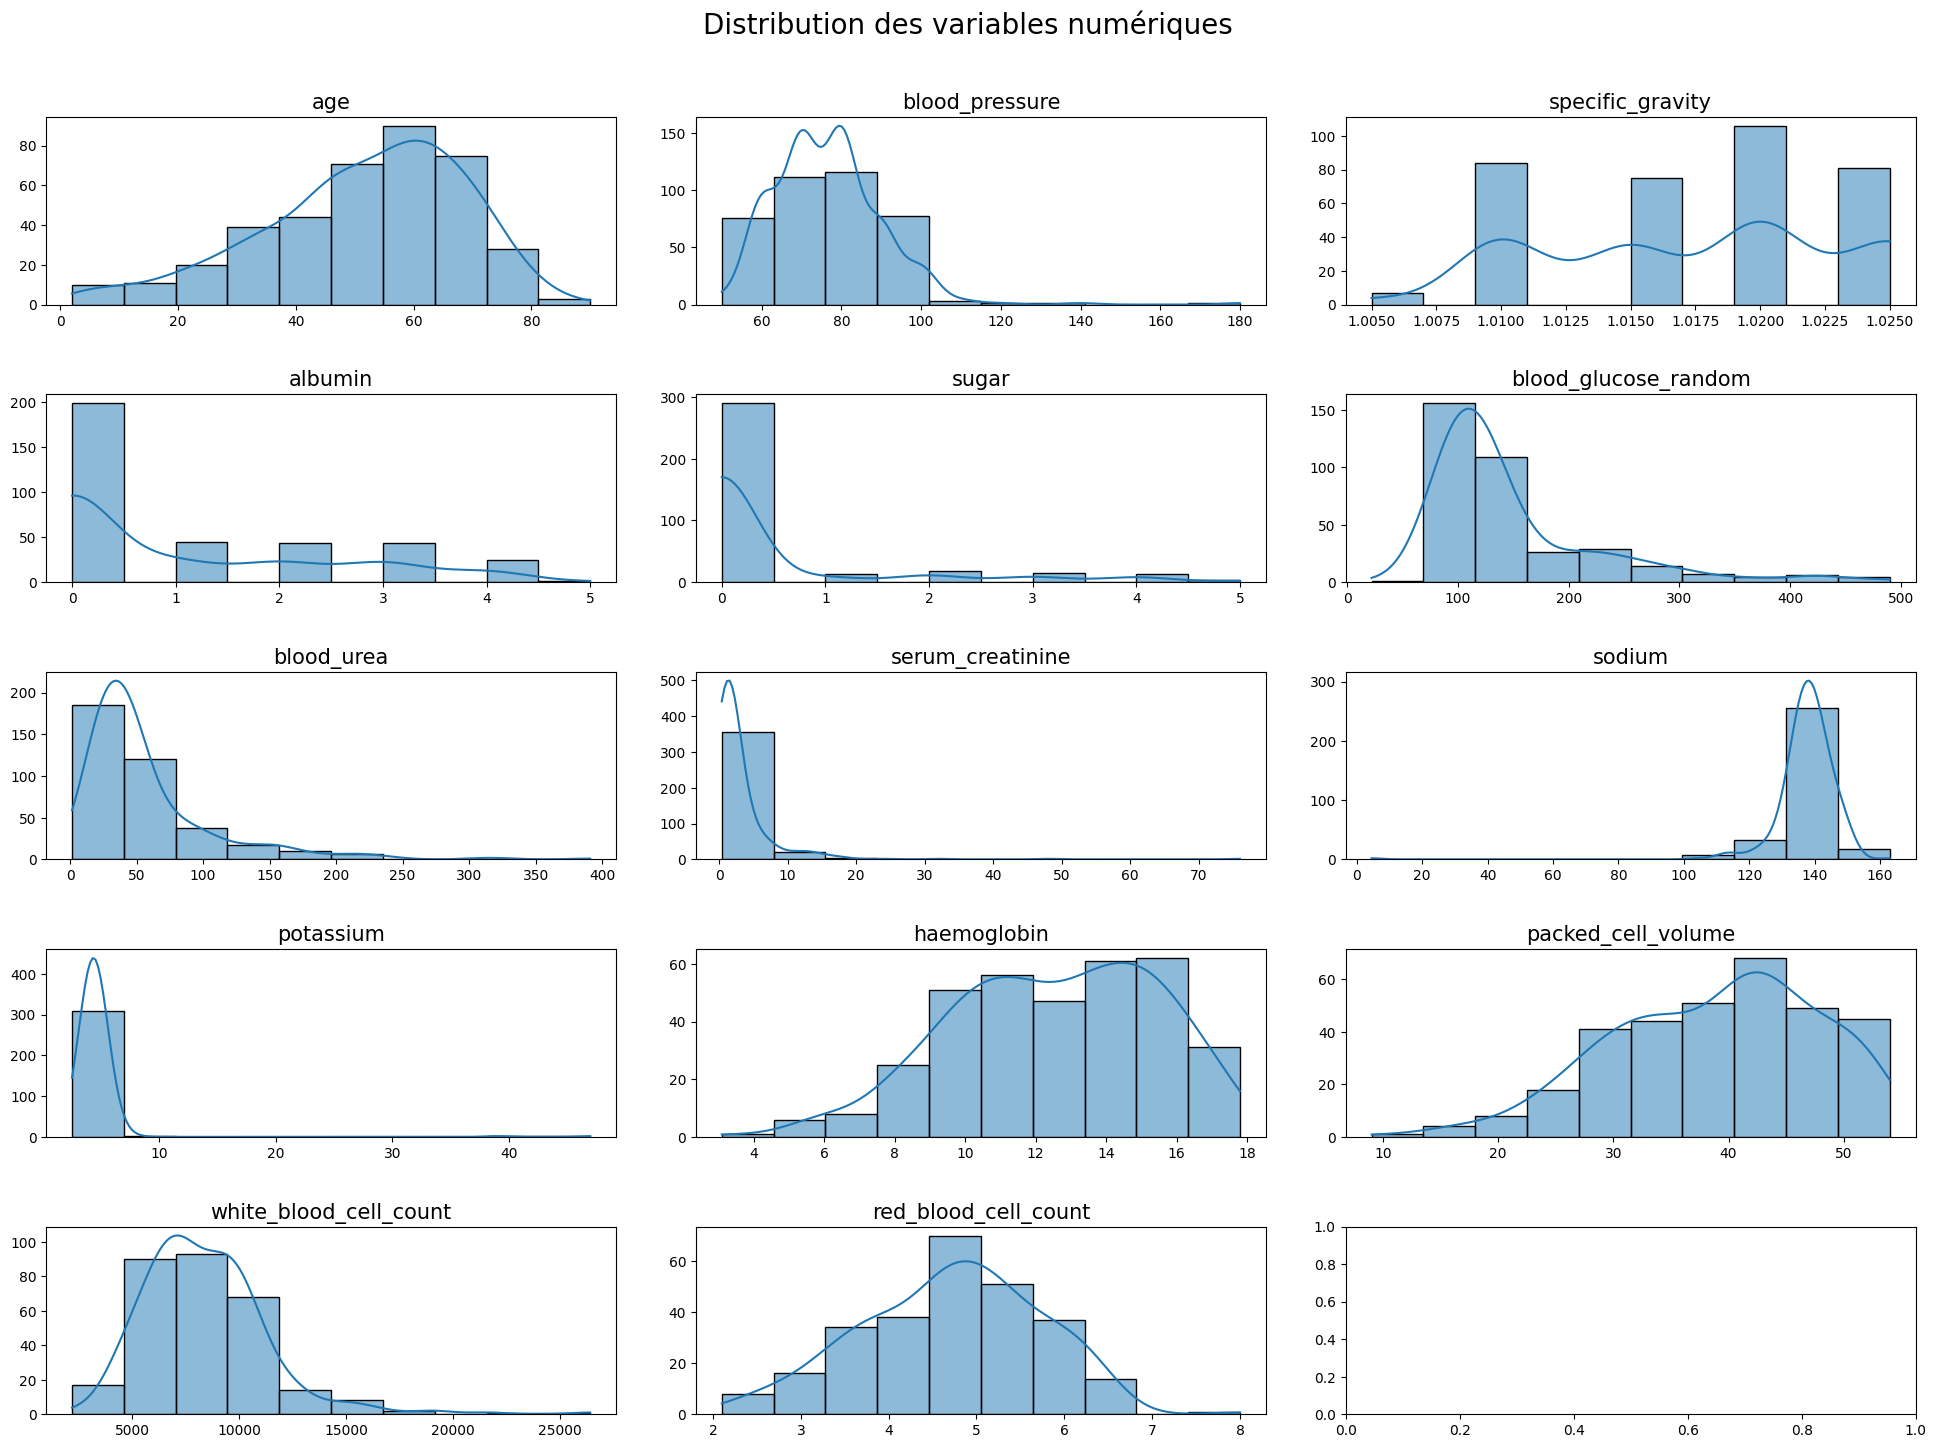

In [42]:
fig, axes = plt.subplots(5, 3, figsize=(20, 15))
fig.suptitle('Distribution des variables numériques', fontsize=20)


for i, col in enumerate(num_cols):
    sns.histplot(df[col],bins='sturges',kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'{col}', fontsize=15)    
    axes[i//3, i%3].set_xlabel('')
    axes[i//3, i%3].set_ylabel('')
plt.tight_layout(pad=3.0)
plt.show()

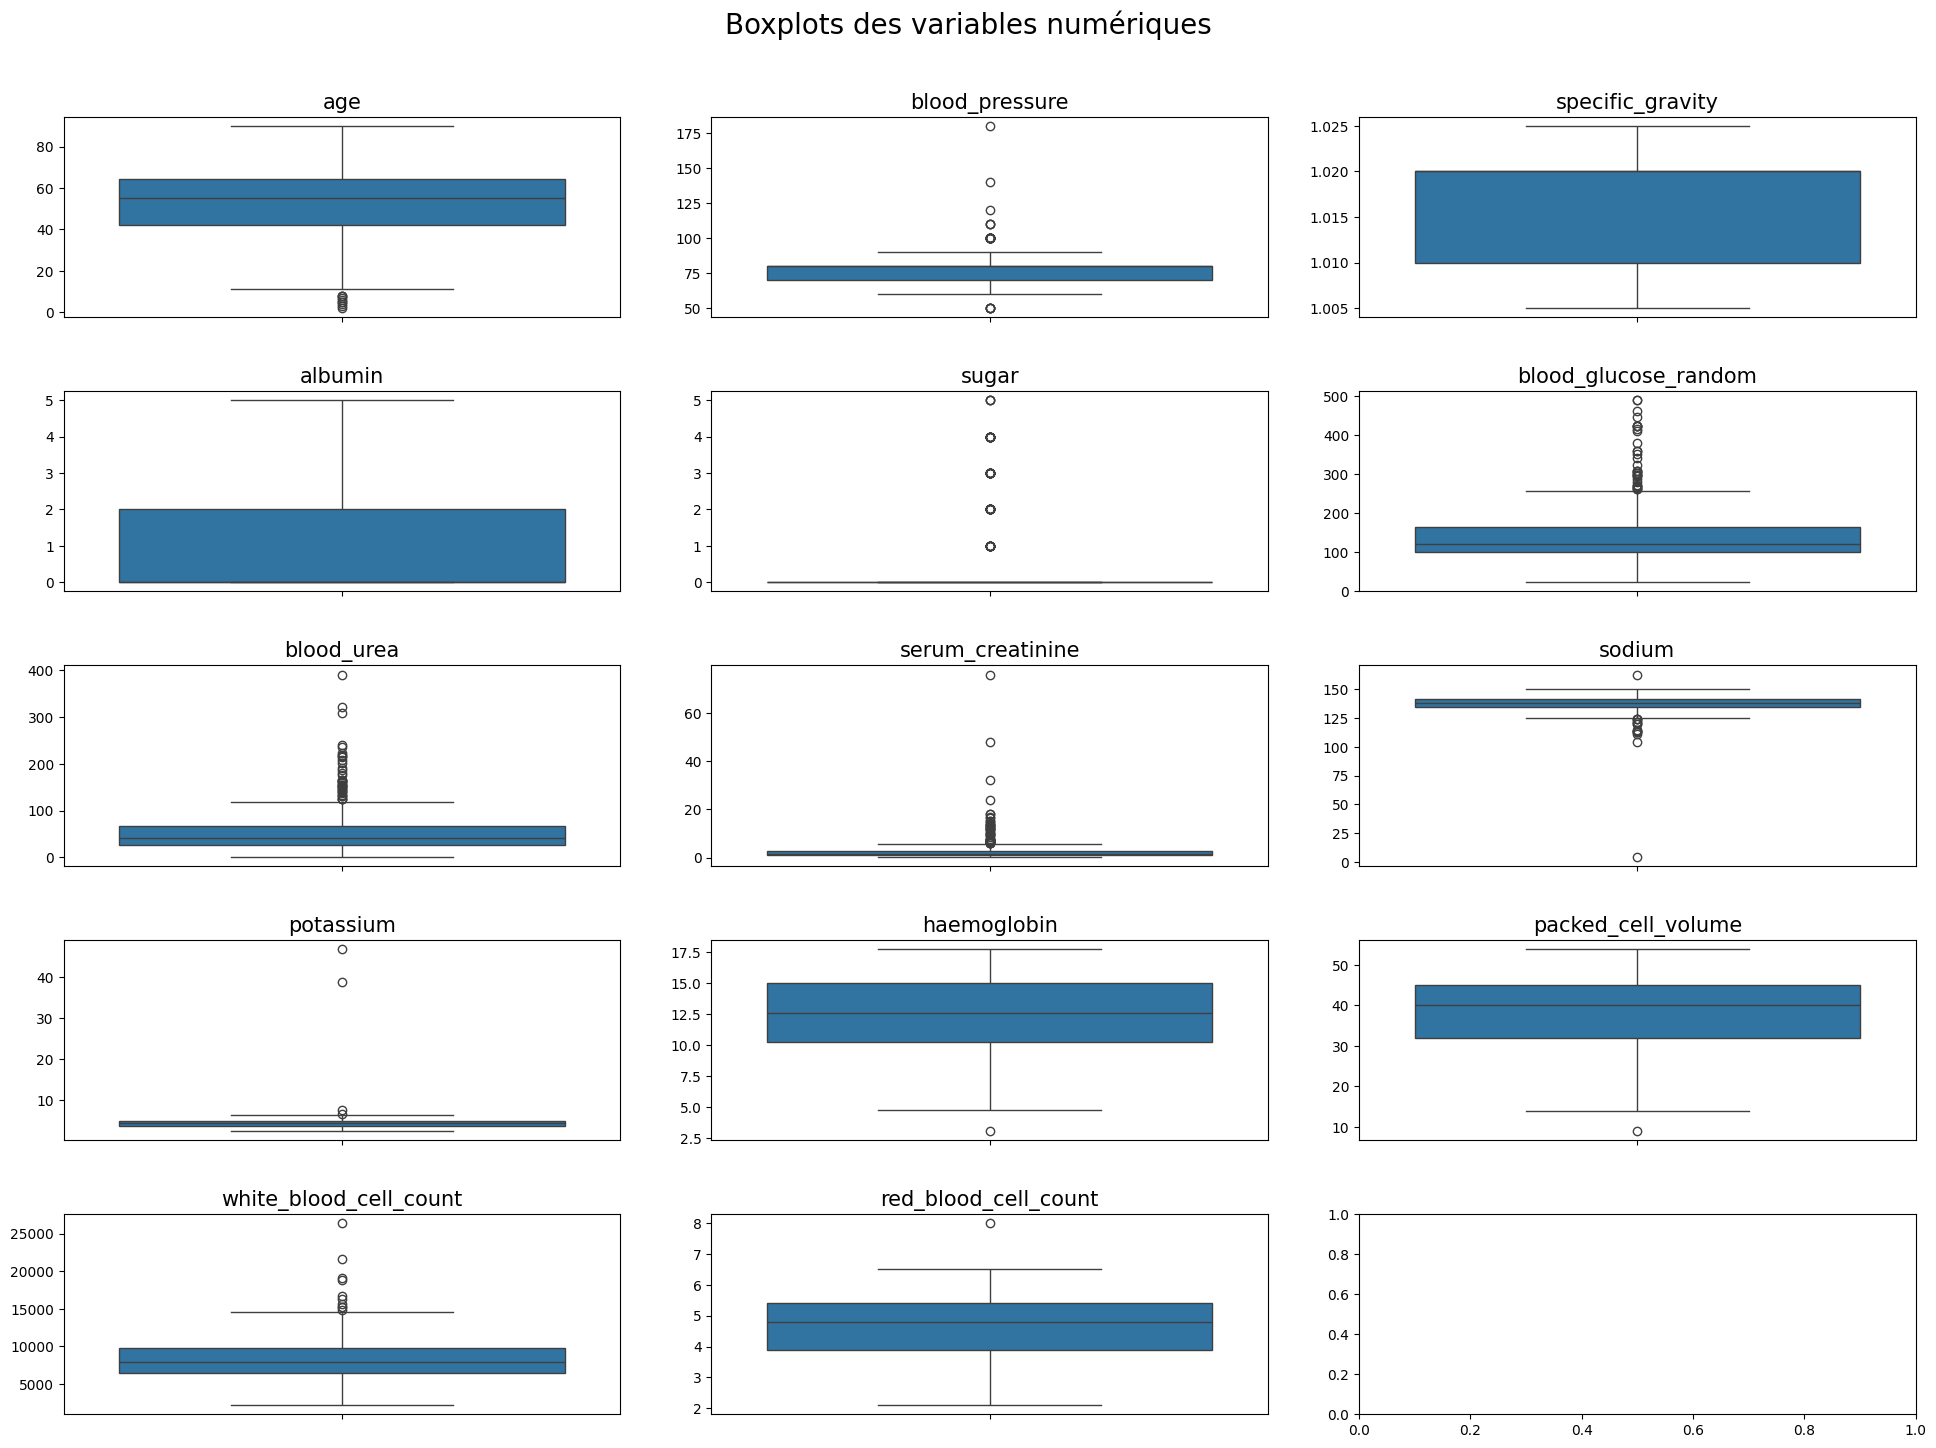

In [43]:
# Boxplots to check the distribution of the data
fig, axes = plt.subplots(5, 3, figsize=(20, 15))
fig.suptitle('Boxplots des variables numériques', fontsize=20)
for i, col in enumerate(num_cols):
    sns.boxplot(df[col], ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'{col}', fontsize=15)
    axes[i//3, i%3].set_xlabel('')
    axes[i//3, i%3].set_ylabel('')
plt.tight_layout(pad=3.0)
plt.show()

In [44]:
# there abnormal high values in blood pressure
# albuminuria(albumin) should be around 30mg/g i got numbers from 0 to 5
# glucose level the same. Should be around 70-99 mg/dL but i have numbers from 0 t 5
# blood glucose random looks like 'normal' glucose measures. are they linked?
# blood urea has some really high outliers (everything above 50 to 75mg/l needs medical attention and indicates kidney damage ) 
# serum creatinine has some really high outliers (everything above 2 needs medical attention and indicates kidney damage ) 
# sodium has some low outliers
# potassium has some really high outliers (everything above 5 needs medical attention and indicates kidney damage )

#### 1.2.2 - Analyse statique descriptive de base

In [45]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 400    │ │ float64     │ 14    │                                                          │
│ │ Number of columns │ 26     │ │ string      │ 11    │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name           ┃ NA   ┃ NA %   ┃ mean   ┃ sd       ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ id                    │    0 │      0 │  199.5 │    115.6 │     0 │ 99.75 │ 199.5 │ 299.2 │   399 │ ▇▇▇▇▇▇ │  │
│ │ age                   │    9 │   2.25 │  51.48 │    17.17 │     2 │    42 │    55 │  64.5 │    90 │ ▁▂▅▇▇▁ │  │
│ │ blood_pressure        │   12 │      3 │  76.47 │    13.68 │    50 │    70 │    80 │    80 │   180 │  ▇▇▁   │  │
│ │ specific_gravity      │   47 │  11.75 │  1.017 │ 0.005717 │ 1.005 │  1.01 │  1.02 │  1.02 │ 1.025 │ ▁▆ ▆▇▆ │  │
│ │ albumin               │   46 │   11.5 │  1.017 │    1.353 │     0 │     0 │     0 │     2 │     5 │ ▇▂▂▂▁  │  │
│ │ sugar                 │   49 │  12.25 │ 0.4501 │    1.099 │     0 │     0 │     0 │     0 │     5 │   ▇    │  │
│ │ blood_glucose_random  │   44 │     11 │    148 │    79.28 │    22 │    99 │   121 │   163 │   490 │  ▃▇▂▁  │  │
│ │ blood_urea            │   19 │   4.75 │  57.43 │     50.5 │   1.5 │    27 │    42 │    66 │   391 │  ▇▂▁   │  │
│ │ serum_creatinine      │   17 │   4.25 │  3.072 │    5.741 │   0.4 │   0.9 │   1.3 │   2.8 │    76 │   ▇    │  │
│ │ sodium                │   87 │  21.75 │  137.5 │    10.41 │   4.5 │   135 │   138 │   142 │   163 │     ▅▇ │  │
│ │ potassium             │   88 │     22 │  4.627 │    3.194 │   2.5 │   3.8 │   4.4 │   4.9 │    47 │   ▇    │  │
│ │ haemoglobin           │   52 │     13 │  12.53 │    2.913 │   3.1 │  10.3 │ 12.65 │    15 │  17.8 │  ▁▅▇▇▅ │  │
│ │ packed_cell_volume    │   71 │  17.75 │  38.88 │     8.99 │     9 │    32 │    40 │    45 │    54 │  ▁▅▅▇▅ │  │
│ │ white_blood_cell_coun │  106 │   26.5 │   8406 │     2944 │  2200 │  6500 │  8000 │  9800 │ 26400 │  ▃▇▂   │  │
│ │ t                     │      │        │        │          │       │       │       │       │       │        │  │
│ │ red_blood_cell_count  │  131 │  32.75 │  4.707 │    1.025 │   2.1 │   3.9 │   4.8 │   5.4 │     8 │ ▁▅▇▇▂  │  │
│ └───────────────────────┴──────┴────────┴────────┴──────────┴───────┴───────┴───────┴───────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                         ┃ NA      ┃ NA %       ┃ words per row           ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ red_blood_cells                     │     152 │     

### 1.3 - Observation des variables catégoritielles

#### 1.3.1 - Analyse du nombre de valeurs unique

In [48]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

anemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [ ]:
# need to clean some values (like \tno to no)

#### 1.3.2 - Analyse des  statistique de base

## 2 - Nettoyage des données

### 2.1 - Traitement des valeurs manquantes

### 2.2 - Traitement des doublons

In [46]:
# check for duplicates
df['id'].duplicated().sum()

0

In [47]:
# if duplicates, show them
#df[df['id'].isin(df['id'][df['id'].duplicated()])].sort_values("id")

### 2.3 - Traitement des valeurs abérantes

## 3 - EDA, analyse statistique univariée et multivariée, Visualisation des données


In [50]:
# Calculate correlation between 'sugar' and 'blood_glucose_random'
correlation = df['sugar'].corr(df['blood_glucose_random'])
print("Correlation between sugar and blood_glucose_random is:", correlation)

Correlation between sugar and blood_glucose_random is: 0.7178267668666237


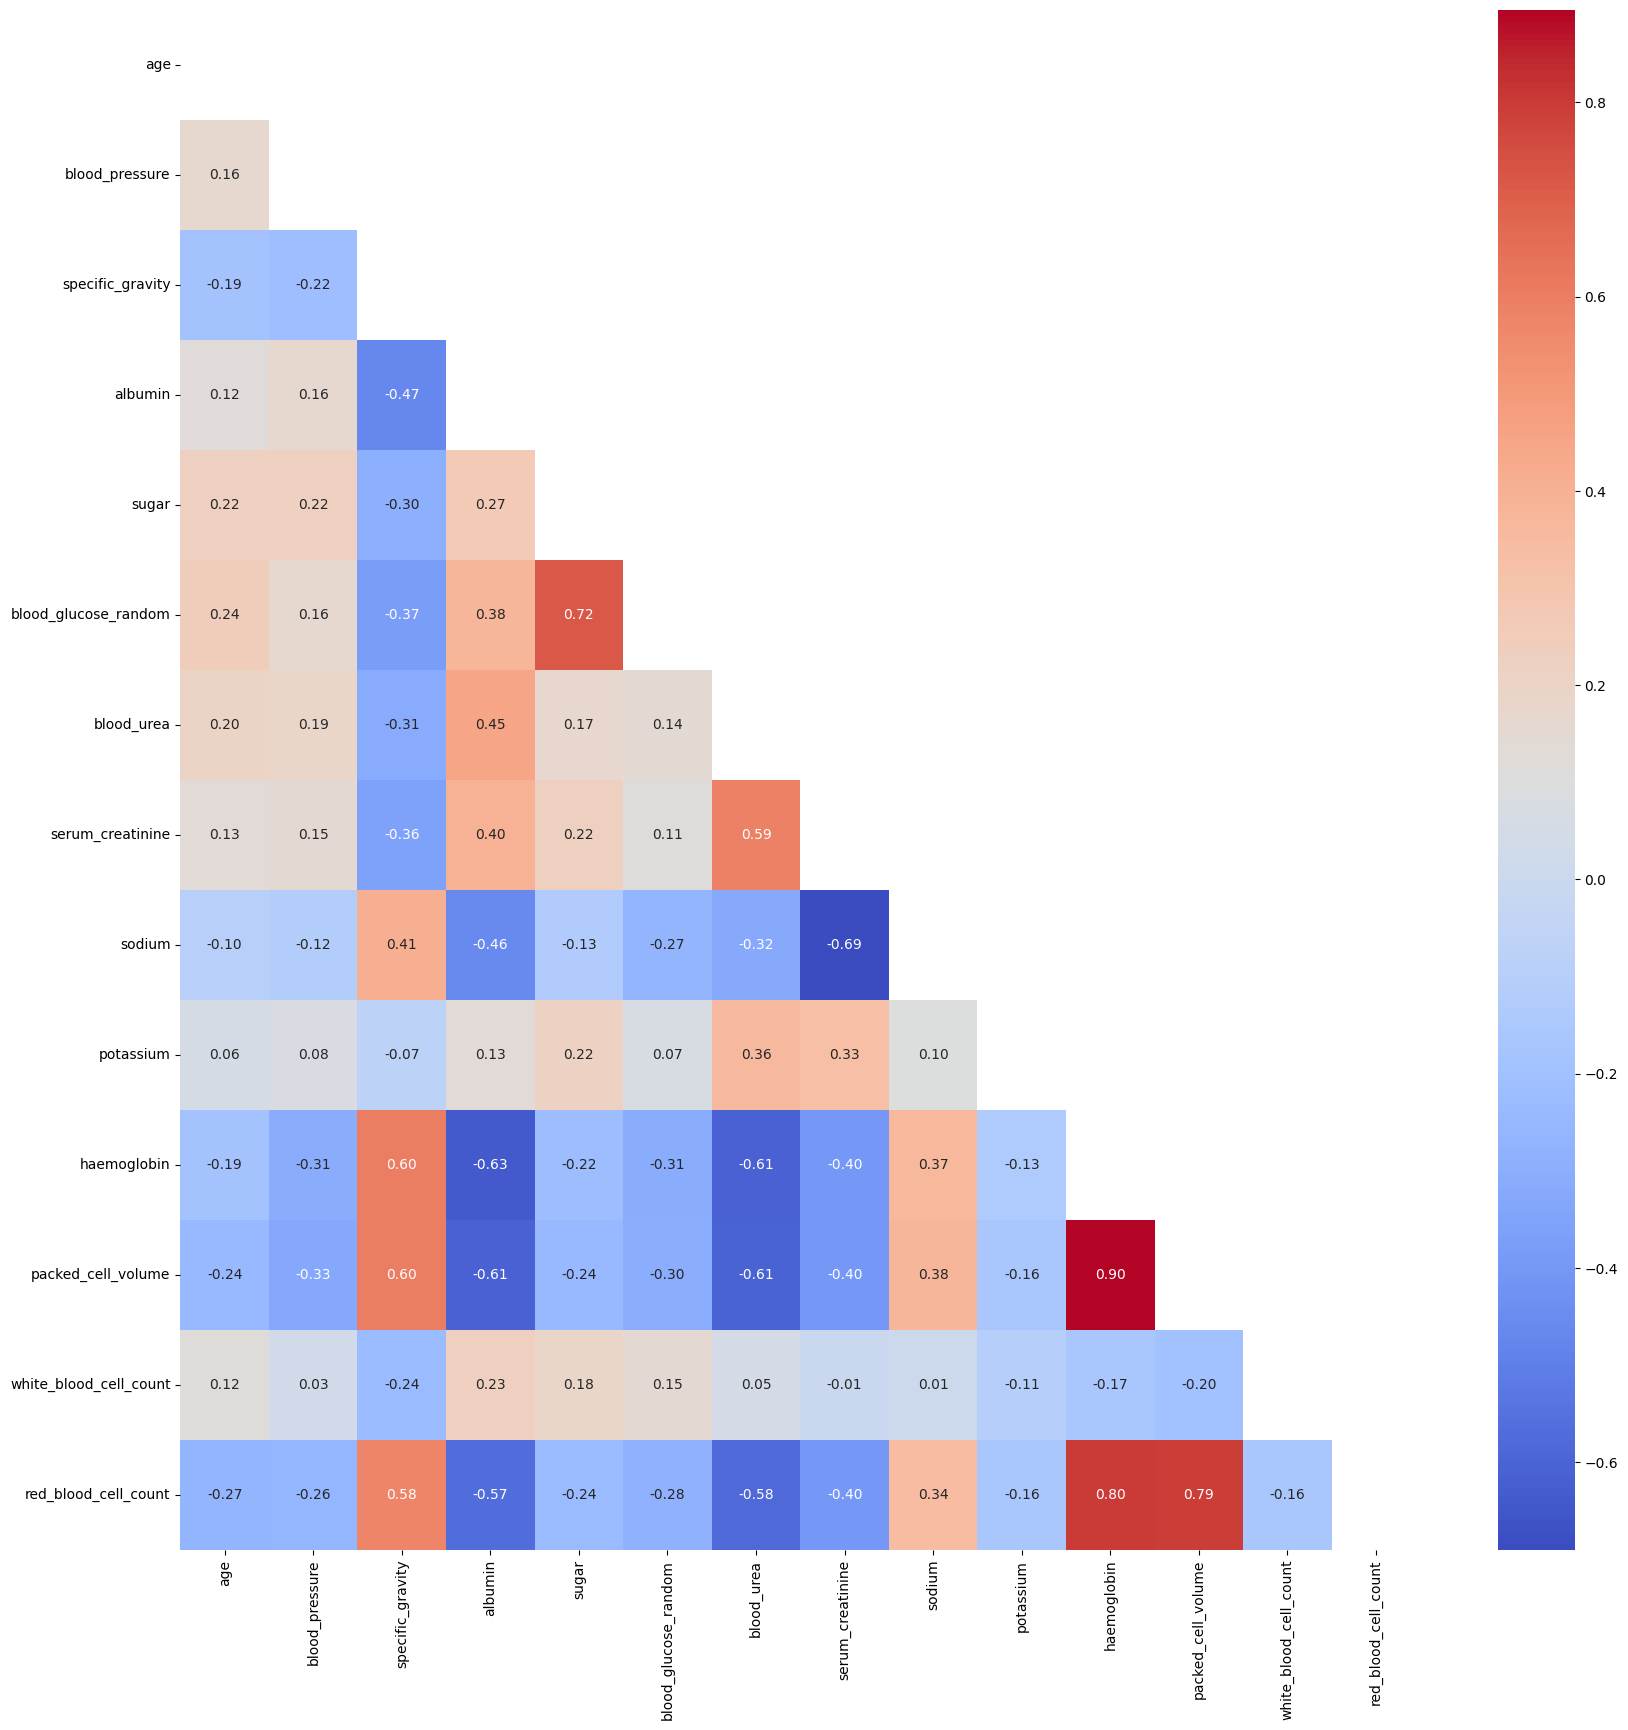

In [57]:
# heatmap
mask = np.triu(df[num_cols].corr())
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', mask=mask)
plt.show()

## 4 - Modélisation